In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 16, 16

from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input
from keras.models import load_model

import tensorflow as tf
import numpy as np
import os
import logging

#PREVENT ERROR UNCESSARY MESSAGES
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Using TensorFlow backend.


In [2]:
import gradcamutils

In [3]:
model = load_model('weights/Both_baselines/Both-Baseline_DenseNet121.h5')
print("The DenseNet121 Baseline Weights are Loaded")

The DenseNet121 Baseline Weights are Loaded


In [4]:
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv5_block15_1_conv (Conv2D)   (None, 7, 7, 128)    122880      conv5_block15_0_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_1_bn (BatchNormal (None, 7, 7, 128)    512         conv5_block15_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block15_1_relu (Activatio (None, 7, 7, 128)    0           conv5_block15_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block15_2_conv (Conv2D)   (None, 7, 7, 32)     36864       conv5_block15_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block15_concat (Concatena (None, 7, 7, 992)    0           conv5_block14_concat[0][0]       
                                                                 conv5_block15_2_conv[0][0]       
__________

image\CXR_normal.jpg


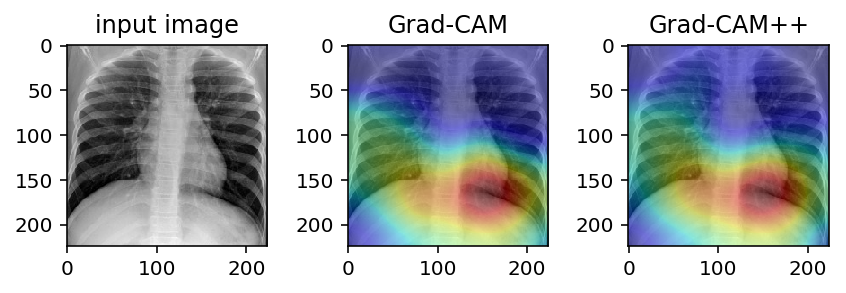

In [5]:
paths = ["CXR_normal.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CXR-Normal.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CXR_covid19.jpg


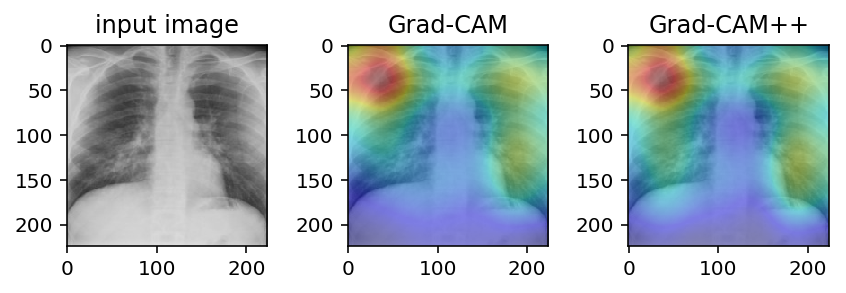

In [6]:
paths = ["CXR_covid19.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CXR-COVID19.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CXR_cap.jpg


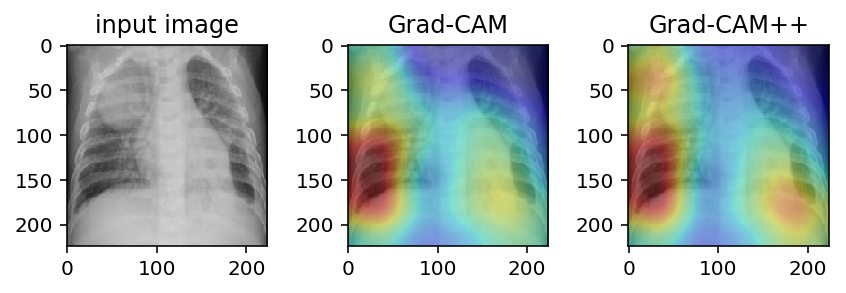

In [7]:
paths = ["CXR_cap.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CXR-Pneumonia.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_normal.jpg


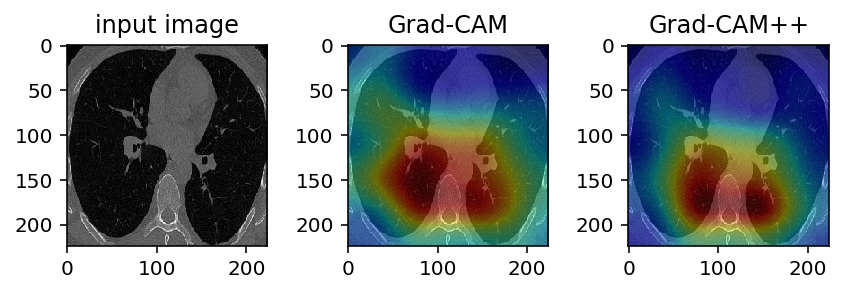

In [8]:
paths = ["CT_normal.jpg"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CT-Normal.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_covid19.png


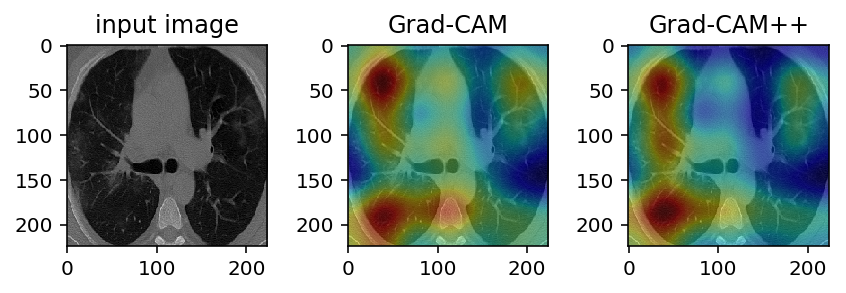

In [9]:
paths = ["CT_covid19.png"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CT-COVID19.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()

image\CT_cap.png


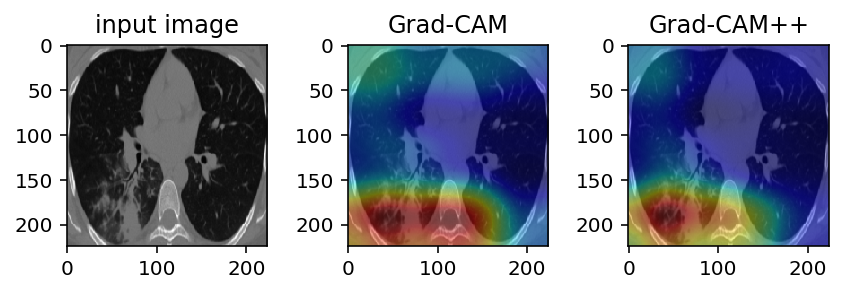

In [10]:
paths = ["CT_cap.png"]

for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='conv5_block16_concat')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='relu')
    print(path)
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.4,cmap="jet")
    plt.title("Grad-CAM++")
    plt.tight_layout()
    plt.savefig("gradcam/Both_baselines/DenseNet121/Baseline-DenseNet121-CT-Pneumonia.tiff", 
                dpi=300, 
                bbox_inches=None, 
                frameon=None,
                pad_inches=0.0)
    plt.show()